## 1. Setup

In [ ]:
# go to binance and setup an api key and secret code
apikey = 'Your API key'
secret = 'Your secret code'

In [145]:
!pip install python-binance pandas mplfinance


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [146]:
# importing binance dependencies
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

## 2. Authenticate

In [147]:
# creating the authentication varibale
client = Client(apikey, secret)

## 3. Get tickers

In [148]:
# tickers are trading pairs or symbols that represent assets traded on finacial markets
# a lot of 'get' returns (shift),
tickers = client.get_all_tickers()

In [149]:
# showing the symbol : ticker, price : value in string
tickers

[{'symbol': 'ETHBTC', 'price': '0.03510000'},
 {'symbol': 'LTCBTC', 'price': '0.00106500'},
 {'symbol': 'BNBBTC', 'price': '0.00730100'},
 {'symbol': 'NEOBTC', 'price': '0.00014680'},
 {'symbol': 'QTUMETH', 'price': '0.00093900'},
 {'symbol': 'EOSETH', 'price': '0.00023500'},
 {'symbol': 'SNTETH', 'price': '0.00001244'},
 {'symbol': 'BNTETH', 'price': '0.00020260'},
 {'symbol': 'BCCBTC', 'price': '0.00000000'},
 {'symbol': 'GASBTC', 'price': '0.00004750'},
 {'symbol': 'BNBETH', 'price': '0.20790000'},
 {'symbol': 'BTCUSDT', 'price': '94651.71000000'},
 {'symbol': 'ETHUSDT', 'price': '3321.72000000'},
 {'symbol': 'HSRBTC', 'price': '0.00000000'},
 {'symbol': 'OAXETH', 'price': '0.00000000'},
 {'symbol': 'DNTETH', 'price': '0.00000000'},
 {'symbol': 'MCOETH', 'price': '0.00000000'},
 {'symbol': 'ICNETH', 'price': '0.00000000'},
 {'symbol': 'MCOBTC', 'price': '0.00000000'},
 {'symbol': 'WTCBTC', 'price': '0.00000024'},
 {'symbol': 'WTCETH', 'price': '0.00000000'},
 {'symbol': 'LRCBTC', 'p

In [150]:
# will return the row values
tickers[1]

{'symbol': 'LTCBTC', 'price': '0.00106500'}

In [151]:
# to return the ticker in the specific index
tickers[11]['symbol']

'BTCUSDT'

In [152]:
# to return the price of the index value
tickers[11]['price']

'94651.71000000'

In [153]:
# create a for loop if you know the ticker but not the index
for index, item in enumerate(tickers):
    if item['symbol'] == 'BTCUSDT':
        print("Index for BTCUSDT:", index)

Index for BTCUSDT: 11


In [154]:
# create a pandas dataframe to make the date easily manipulated
ticker_df = pd.DataFrame(tickers)

In [155]:
# show the first 12 rows of data
ticker_df.head(12)

,symbol,price
0,ETHBTC,0.03510000
1,LTCBTC,0.00106500
2,BNBBTC,0.00730100
3,NEOBTC,0.00014680
4,QTUMETH,0.00093900
5,EOSETH,0.00023500
6,SNTETH,0.00001244
7,BNTETH,0.00020260
8,BCCBTC,0.00000000
9,GASBTC,0.00004750


In [156]:
btc_index = ticker_df.loc[ticker_df['symbol'] == 'BTCUSDT'].index[0]
btc_index

11

In [157]:
ticker_df.loc[11]

symbol           BTCUSDT
price     94651.71000000
Name: 11, dtype: object

In [158]:
LTCBTC_index = ticker_df.query("symbol == 'LTCBTC'").index[0]
LTCBTC_index

1

In [159]:
ticker_df.set_index('symbol', inplace = True)
ticker_df

,price
symbol,
ETHBTC,0.03510000
LTCBTC,0.00106500
BNBBTC,0.00730100
NEOBTC,0.00014680
QTUMETH,0.00093900
...,...
USUALBTC,0.00001217
USUALFDUSD,1.15430000
USUALTRY,40.78000000


In [160]:
ticker_df.loc['BTCUSDT']['price']

'94651.71000000'

In [161]:
# converting the string to a float
float(ticker_df.loc['BTCUSDT']['price'])

94651.71

 ## 4. Depth

In [162]:
# to retrieve market depth
depth = client.get_order_book(symbol='BTCUSDT')
depth

{'lastUpdateId': 57365062064,
 'bids': [['94681.22000000', '2.59956000'],
  ['94681.09000000', '0.31500000'],
  ['94680.84000000', '0.64468000'],
  ['94680.00000000', '0.03100000'],
  ['94679.13000000', '0.26945000'],
  ['94676.87000000', '0.04111000'],
  ['94676.00000000', '0.03100000'],
  ['94675.94000000', '0.13352000'],
  ['94675.93000000', '0.00006000'],
  ['94675.42000000', '0.01411000'],
  ['94674.34000000', '0.00069000'],
  ['94674.12000000', '0.00026000'],
  ['94672.01000000', '0.01088000'],
  ['94672.00000000', '0.03106000'],
  ['94671.34000000', '0.00500000'],
  ['94671.09000000', '0.00008000'],
  ['94671.04000000', '0.00006000'],
  ['94668.00000000', '0.03100000'],
  ['94667.35000000', '0.06971000'],
  ['94667.34000000', '0.15839000'],
  ['94667.22000000', '0.00011000'],
  ['94664.75000000', '0.10134000'],
  ['94664.73000000', '0.02534000'],
  ['94664.20000000', '0.01635000'],
  ['94664.00000000', '0.03100000'],
  ['94663.49000000', '0.00105000'],
  ['94662.94000000', '0.00

In [163]:
depth_df = pd.DataFrame(depth['bids'])
depth_df.columns = ['Price', 'Volume']
depth_df.head(5)

,Price,Volume
0,94681.22000000,2.59956000
1,94681.09000000,0.31500000
2,94680.84000000,0.64468000
3,94680.00000000,0.03100000
4,94679.13000000,0.26945000


# 5. Get Historical data

In [164]:
# klines are candlesticks, this function is retrieving trading data; open, close, high, low, volume etc
# 
client.get_historical_klines??

In [165]:
# retrieve symbol, interval, start date
historical = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')
historical

[[1502928000000,
  '4261.48000000',
  '4485.39000000',
  '4200.74000000',
  '4285.08000000',
  '795.15037700',
  1503014399999,
  '3454770.05073206',
  3427,
  '616.24854100',
  '2678216.40060401',
  '0'],
 [1503014400000,
  '4285.08000000',
  '4371.52000000',
  '3938.77000000',
  '4108.37000000',
  '1199.88826400',
  1503100799999,
  '5086958.30617151',
  5233,
  '972.86871000',
  '4129123.31651808',
  '0'],
 [1503100800000,
  '4108.37000000',
  '4184.69000000',
  '3850.00000000',
  '4139.98000000',
  '381.30976300',
  1503187199999,
  '1549483.73542151',
  2153,
  '274.33604200',
  '1118001.87008735',
  '0'],
 [1503187200000,
  '4120.98000000',
  '4211.08000000',
  '4032.62000000',
  '4086.29000000',
  '467.08302200',
  1503273599999,
  '1930364.39032646',
  2321,
  '376.79594700',
  '1557401.33373730',
  '0'],
 [1503273600000,
  '4069.13000000',
  '4119.62000000',
  '3911.79000000',
  '4016.00000000',
  '691.74306000',
  1503359999999,
  '2797231.71402728',
  3972,
  '557.35610700',

In [166]:
# taking the raw data and putting it in a pd.DataFrame
hist_df = pd.DataFrame(historical)
hist_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,0
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,0


In [167]:
# dispalying the dimensions of the df
hist_df.shape

(2690, 12)

In [168]:
# giving the columns names
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [169]:
# checking the datatypes, if they're objects, they'll need to be float
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

# 6. Processing historical data

In [170]:
# converting the epoch timestamps to human-readable format
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [171]:
# creating a variable to hold specific column that we'll switch to numeric (float)
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [172]:
# using the created variable to switch the datatype
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [173]:
# displaying the beginning of the df, will show the start date of transactions
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999000064,3.454770e+06,3427,616.248541,2.678216e+06,0
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999000064,5.086958e+06,5233,972.868710,4.129123e+06,0
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999000064,1.549484e+06,2153,274.336042,1.118002e+06,0
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999000064,1.930364e+06,2321,376.795947,1.557401e+06,0
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999000064,2.797232e+06,3972,557.356107,2.255663e+06,0


In [174]:
# showig the most recent transaction date
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
2685,2024-12-23,95186.28,96538.92,92520.00,94881.47,32810.76703,2024-12-23 23:59:59.999000064,3.100007e+09,5464919,16339.58355,1.544707e+09,0
2686,2024-12-24,94881.47,99487.99,93569.02,98663.58,23674.22488,2024-12-24 23:59:59.999000064,2.287214e+09,3421549,11969.25390,1.156798e+09,0
2687,2024-12-25,98663.58,99569.15,97632.02,99429.60,14474.16510,2024-12-25 23:59:59.999000064,1.426144e+09,3283028,7006.52650,6.904651e+08,0
2688,2024-12-26,99429.61,99963.70,95199.14,95791.60,21192.36727,2024-12-26 23:59:59.999000064,2.049124e+09,5203490,10071.87249,9.739406e+08,0
2689,2024-12-27,95791.60,97544.58,94525.63,94759.35,16549.67952,2024-12-27 23:59:59.999000064,1.589867e+09,3699895,8116.56144,7.800722e+08,0


In [175]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [176]:
hist_df.describe()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,2690,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690,2.690000e+03,2.690000e+03,2690.000000,2.690000e+03
mean,2021-04-22 12:00:00,26894.409327,27549.569732,26196.264204,26928.106138,68177.376689,2021-04-23 11:59:28.510074112,1.720203e+09,1.614651e+06,33898.125322,8.522420e+08
min,2017-08-17 00:00:00,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,2017-08-17 23:59:59.999000064,9.778657e+05,2.153000e+03,56.190141,2.413638e+05
25%,2019-06-20 06:00:00,8527.802500,8750.000000,8200.750000,8532.405000,28169.774337,2019-06-21 05:59:59.999000064,3.266565e+08,3.458858e+05,14177.624494,1.671468e+08
50%,2021-04-22 12:00:00,20141.665000,20515.740000,19625.725000,20151.265000,43665.526355,2021-04-23 11:59:59.999000064,9.961565e+08,9.345370e+05,21796.449770,4.856894e+08
75%,2023-02-23 18:00:00,41921.372500,42787.210000,40803.470000,41941.357500,71269.852565,2023-02-24 17:59:59.999000064,2.429680e+09,1.815956e+06,35421.246954,1.203278e+09
max,2024-12-27 00:00:00,106133.740000,108353.000000,105321.490000,106133.740000,760705.362783,2024-12-27 23:59:59.999000064,1.746531e+10,1.522359e+07,374775.574085,8.783916e+09
std,NaN,21886.229632,22376.750088,21387.400896,21920.972082,80161.824354,NaN,2.005050e+09,2.059976e+06,39887.308076,9.970264e+08


In [177]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2690 entries, 0 to 2689
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           2690 non-null   datetime64[ns]
 1   Open                2690 non-null   float64       
 2   High                2690 non-null   float64       
 3   Low                 2690 non-null   float64       
 4   Close               2690 non-null   float64       
 5   Volume              2690 non-null   float64       
 6   Close Time          2690 non-null   datetime64[ns]
 7   Quote Asset Volume  2690 non-null   float64       
 8   Number of Trades    2690 non-null   int64         
 9   TB Base Volume      2690 non-null   float64       
 10  TB Quote Volume     2690 non-null   float64       
 11  Ignore              2690 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 252.3+ KB


## 7. Viz

In [180]:
# install mplfinance (matplotlib finance)
!pip install mplfinance


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [181]:
# importing mplfinance
import mplfinance as mpf

In [182]:
# displaying the df with the set_index = 'Close Time'
hist_df.set_index('Close Time')

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2017-08-17 23:59:59.999000064,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427,616.248541,2.678216e+06,0
2017-08-18 23:59:59.999000064,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233,972.868710,4.129123e+06,0
2017-08-19 23:59:59.999000064,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153,274.336042,1.118002e+06,0
2017-08-20 23:59:59.999000064,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321,376.795947,1.557401e+06,0
2017-08-21 23:59:59.999000064,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972,557.356107,2.255663e+06,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 23:59:59.999000064,2024-12-23,95186.28,96538.92,92520.00,94881.47,32810.767030,3.100007e+09,5464919,16339.583550,1.544707e+09,0
2024-12-24 23:59:59.999000064,2024-12-24,94881.47,99487.99,93569.02,98663.58,23674.224880,2.287214e+09,3421549,11969.253900,1.156798e+09,0
2024-12-25 23:59:59.999000064,2024-12-25,98663.58,99569.15,97632.02,99429.60,14474.165100,1.426144e+09,3283028,7006.526500,6.904651e+08,0


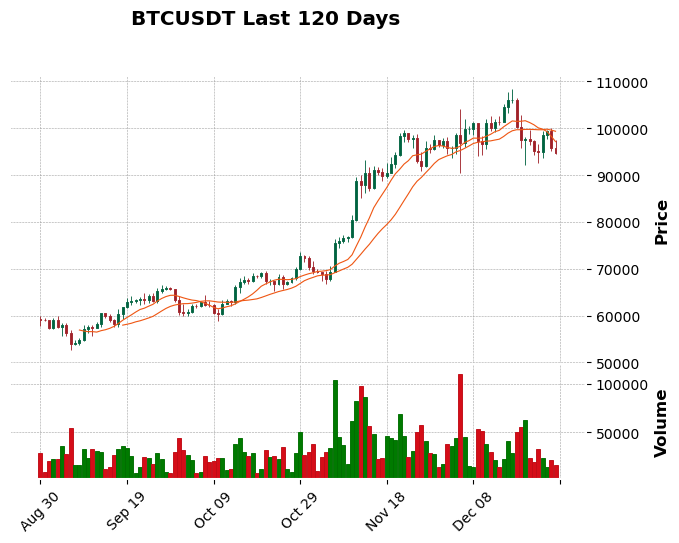

In [183]:
# visualising the tail 100 of the df using mpf.plt
# type= changes the visualisation to candle stick
# volume= will visualise the trading volume represented for that period
# mav= adds moivng averages 10 days, 20 days etc
mpf.plot(hist_df.set_index('Close Time').tail(120),
        type='candle', style='charles',
        volume=True,
        title='BTCUSDT Last 120 Days',
        mav=(10,20))